In [1]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


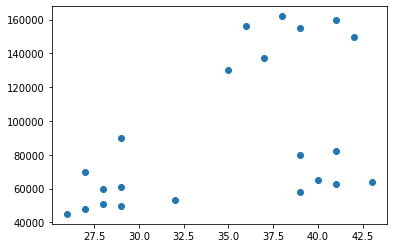

In [4]:
plt.scatter(x = df['Age'], y = df['Income($)'])

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predicted = km.fit_predict(df.drop('Name',1))
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [8]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [9]:
import seaborn as sns

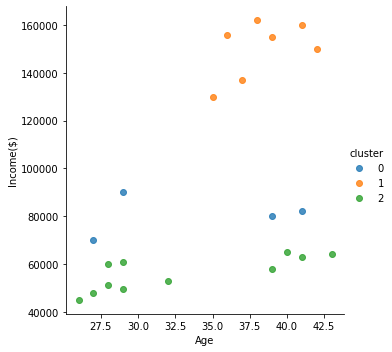

In [13]:
sns.lmplot(x='Age',y='Income($)',data = df, hue='cluster',fit_reg=False)

Here there is a little mistake in clustering group 0 and 2 due to poor scaling as range of income is 40000 to 160000 while that of Age is around 25 to 44.

In [18]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [21]:
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df[['Age','Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


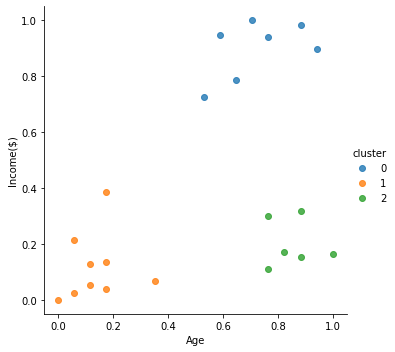

In [23]:
sns.lmplot(x='Age',y='Income($)',data = df, hue='cluster',fit_reg=False,legend=True)

In [24]:
km.cluster_centers_       #centroids of the clusters

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

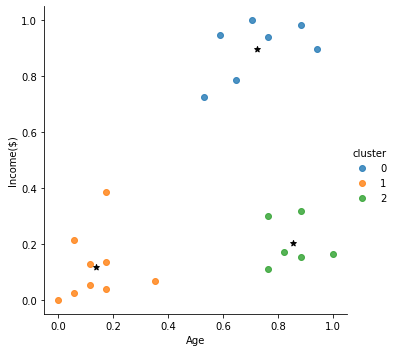

In [26]:
sns.lmplot(x='Age',y='Income($)',data = df, hue='cluster',fit_reg=False,legend=True)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black', marker = '*')

### Elbow Technique

In [28]:
k_range = range(1,10)
sse = []

for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

In [29]:
sse

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.36250799007973267,
 0.2621792762345213,
 0.22443334487241418,
 0.184278684552248,
 0.13265419827245162,
 0.10383752586603559]

Text(0, 0.5, 'SSE')

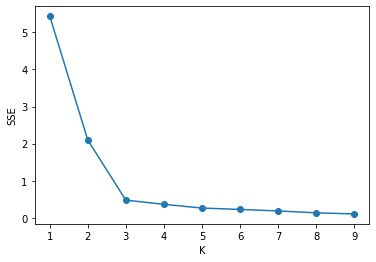

In [37]:
plt.scatter(k_range,sse)
plt.plot(k_range,sse)
plt.xlabel('K')
plt.ylabel('SSE')